In [5]:
from keras.models import Sequential, load_model
from flask import Flask, request, app, jsonify, render_template, url_for
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [6]:
print("hello")

hello


In [7]:
model = load_model('./model.h5')

In [8]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
path = 'C:/Users/tarun/Desktop/diginique/test images/ship4.png'
img = Image.open(path)
img1 = cv2.imread(path)
img1 = np.expand_dims(img1, axis = 0)
preds = model.predict(img1)
output = np.argmax(preds)
print(output)
class_names[output]

1/1 [==============================] - 0s 401ms/step
8


'ship'

In [9]:
app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')
#     return render_template('home.html')

@app.route('/',methods=['POST'])
def predicting():
    imagefile = request.files['image']
    image_path = 'C:/Users/tarun/Desktop/diginique/static/images/' + "test.png"
    imagefile.save(image_path)
    path = 'C:/Users/tarun/Desktop/diginique/static/images/test.png'
    img = Image.open(path)
    img1 = cv2.imread(path)
    img1 = cv2.resize(img1, (32, 32))
    img1 = np.expand_dims(img1, axis = 0)
    preds = model.predict(img1)
    output = np.argmax(preds)
    predict = class_names[output]
    
    plt.imshow(img)
    return render_template('index.html', prediction = "Output is = {}".format(predict))

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Jul/2023 18:31:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2023 18:31:29] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [22/Jul/2023 18:31:29] "GET /static/images/favicon.png HTTP/1.1" 404 -


1/1 [==============================] - 0s 37ms/step


127.0.0.1 - - [22/Jul/2023 18:31:37] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2023 18:31:37] "GET /static/css/main.css HTTP/1.1" 304 -


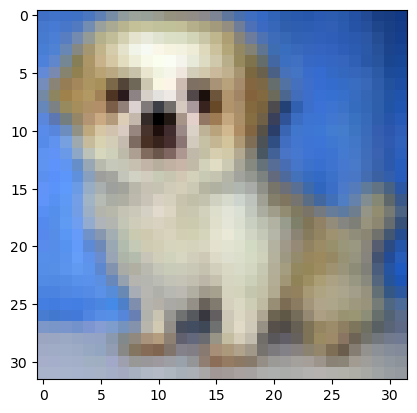

In [10]:
app.run()